# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Цель** – определение рыночной стоимости недвижимости.

**Задачи:**

- Определение факторов, влияющих на стоимость недвижимости и степень их влияния;
- Пространственный анализ характеристик недвижимости и объявлений.

**Данные**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах (м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.

**Этапы исследования:**

1. Обзор данных;
2. Предобработка данных;
3. Предварительные расчёты;
4. Исследовательский анализ данных;
5. Выводы.

## Изучение данных из файла

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('real_estate_data.csv', sep='\t')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [106]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [107]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Количество строк составляет 23699. Наблюдается сильное отличие среднего от медианы в столбце "days_exposition".

Выведем названия тех столбцов, в которых есть пропуски.

In [108]:
# Поиск столбцов с пропущенными значаениями и их сумма по столбцам
data_isna = data.isna().sum()
data_isna.loc[data_isna > 0]

ceiling_height          9195
floors_total              86
living_area             1903
is_apartment           20924
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
dtype: int64

Посмотрим на долю пропущенных значений.

In [109]:
# Рассчет доли пропущенных значений
data_isna_mean = data.isna().mean()
round(data_isna_mean.loc[data_isna_mean > 0], 3)

ceiling_height         0.388
floors_total           0.004
living_area            0.080
is_apartment           0.883
kitchen_area           0.096
balcony                0.486
locality_name          0.002
airports_nearest       0.234
cityCenters_nearest    0.233
parks_around3000       0.233
parks_nearest          0.659
ponds_around3000       0.233
ponds_nearest          0.616
days_exposition        0.134
dtype: float64

## Предобработка данных

### Переименование столбцов

In [110]:
#Переименование столбцов
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                     'parks_around3000' : 'parks_around_3000',
                     'ponds_around3000' : 'ponds_around_3000'})
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Обзор пропущенных значений

Значительное количество пропущенных значений наблюдается в следующих столбцах:
    
    - `is_apartment`
    - `balcony`
    - `parks_nearest`
    - `ponds_nearest`
    - `ceiling_height`

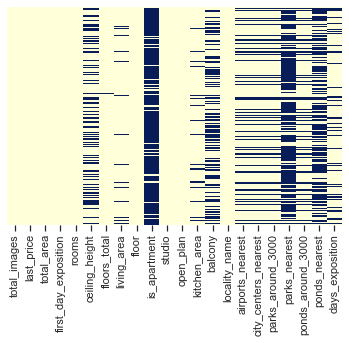

In [111]:
# Визуальное рассмотрение пропущенных значений
import seaborn as sns
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");

Пропуски в основном расположены в разных строках.
Прослеживается однородность пропущенных значений в столбцах:
      
    - `airports_nearest`      
    - `city_centers_nearest`    
    - `parks_around_3000`        
    - `parks_nearest`         
    - `ponds_around_3000`    
    - `ponds_nearest`     

### Замена пропущенных значений

**Категоризация замены пропусков:**

- Замена на 0/False. Считаем, что клиент ничего не указывал, потому что данного параметра в жилье не наблюдается:
    - `is_apartment`
    - `balcony`
    - `kitchen_area` (для студий)
- Замена на 0. Считаем, что клиент/база ничего не указывал потому, что в радиусе 3 км от объекта недвижимости ни прудов, ни парков не наблюдается:    
    - `parks_around_3000`
    - `ponds_around_3000`
- Оставляем пустые значения в количественных столбцах `nearest` потому, что система могла не указать количественную характеристику, т.к. она расположена достаточно далеко от недвижимости:
    - `airports_nearest`      
    - `city_centers_nearest`
    - `parks_nearest`
    - `ponds_nearest`
    
Пропуски в остальных столбцах менее однозначные, потэтому не буду их категоризировать. Для некоторых столбцов, к примеру `ceiling_height`, можно придумать возможную зависимсиость от этажности, однако, такая замена не добавит независимые значения в столбец, т.е. не привнесет новую информацию, а в каких-то случаях может дать заведомо ложную, что может сказаться на дальнейших выводах.

#### `is_apartment`

In [112]:
# Замена nan на False
data['is_apartment'] = data['is_apartment'].fillna(False)
sorted((data['is_apartment'].unique()))

[False, True]

#### `balcony`

In [113]:
# Замена nan на 0
data['balcony'] = data['balcony'].fillna(0)
sorted((data['balcony'].unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

#### `kitchen_area`

В каких квартирах обычно нет кухонь как отдельных комнат? В студиях. 

Проверим как nan в `kitchen_area` соотносится с True в `studio`

In [114]:
# Количество пропусков в kitchen_area
data['kitchen_area'].isna().sum()

2278

In [115]:
# Количество уникальных значений в studio
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [116]:
# Количество значений nan в kitchen_area соответствующих True в studio
data[(data['kitchen_area'].isna()) & (data['studio'] == True)]['studio'].count()

149

Пропусков в `kitchen_area` гораздо больше, чем студий. Однако, все 149 True в `studio` соответствуют пропускам в `kitchen_area`.

Таким образом, эти 149 пропусков в `kitchen_area` логично заменить на 0, а остальные пропуски оставить как есть.

In [117]:
# Замена
data.loc[(data['studio'] == True), 'kitchen_area'] = data['kitchen_area'].fillna(0)

In [118]:
# Проверка
data.loc[data['kitchen_area'] == 0, 'kitchen_area'].count()

149

#### `parks_around_3000` и `ponds_around_3000`

In [119]:
# Замена на 0
data[['parks_around_3000', 'ponds_around_3000']] = data[['parks_around_3000', 'ponds_around_3000']].fillna(0)

In [120]:
# Проверка
data[['parks_around_3000', 'ponds_around_3000']].isna().sum()

parks_around_3000    0
ponds_around_3000    0
dtype: int64

#### `floors_total`

Удалю 86 строк со значениями nan в `floors_total` для того, чтобы в дальнейшем они не мешеали. Их мало, поэтому удаление не приведет к изменению статистических характеристик.

In [121]:
# Замена
data = data.dropna(subset=['floors_total'])

In [122]:
# Проверка
data['floors_total'].isna().sum()

0

#### <font color='Blue'>`Ceiling_height`</font>

Проверка распределения значений по столбцам в пропусках и без них. Если распределения примерно одинаковые, то можно для каждаго значения рассчитать медиану и вставить её в соответствующий этому занчению пропуск.

In [123]:
# Поиск nan
empty_ceiling_height = pd.isna(data['ceiling_height'])

In [124]:
# Статистика по долям занчений floors_total при ceiling_height = nan
data[empty_ceiling_height]['floors_total'].value_counts(normalize=True)[:15]

5.0     0.232726
9.0     0.132047
25.0    0.060540
16.0    0.056043
12.0    0.055824
10.0    0.046501
4.0     0.045076
17.0    0.036192
6.0     0.032354
3.0     0.029502
24.0    0.027638
18.0    0.025225
14.0    0.023031
19.0    0.022483
7.0     0.021277
8.0     0.018644
2.0     0.018425
23.0    0.017109
22.0    0.015903
15.0    0.015354
Name: floors_total, dtype: float64

In [125]:
# Статистика по долям занчений floors_total при ceiling_height != nan
data[~empty_ceiling_height]['floors_total'].value_counts(normalize=True)[:15]

5.0     0.252915
9.0     0.176406
16.0    0.059676
12.0    0.058848
4.0     0.054433
10.0    0.051742
6.0     0.042704
25.0    0.036081
17.0    0.034702
3.0     0.027527
7.0     0.027458
14.0    0.023663
18.0    0.018972
15.0    0.015523
Name: floors_total, dtype: float64

На мой взгляд распределение значений 'floors_total' с пропусками и без (в столбце ceiling_height) примерно одинаковые.

In [126]:
# Расчет медианного значения ceiling_height для каждого значения floors_total
floors_total_median = data.groupby(by='floors_total')['ceiling_height'].median()
floors_total_median

floors_total
1.0      2.80
2.0      2.70
3.0      2.80
4.0      3.00
5.0      2.55
6.0      3.00
7.0      3.00
8.0      2.80
9.0      2.55
10.0     2.60
11.0     2.75
12.0     2.65
13.0     2.70
14.0     2.60
15.0     2.70
16.0     2.70
17.0     2.70
18.0     2.70
19.0     2.75
20.0     2.75
21.0     2.70
22.0     2.75
23.0     2.75
24.0     2.75
25.0     2.75
26.0     2.66
27.0     2.70
28.0     2.60
29.0     2.60
33.0      NaN
34.0     2.65
35.0     2.70
36.0    14.85
37.0     1.75
52.0     2.65
60.0     2.88
Name: ceiling_height, dtype: float64

In [127]:
# Исключение анаомальных значений и nan
floors_total_median = floors_total_median.drop(labels=[33.0, 36.0])

In [128]:
# Количество nan в ceiling_height до замены
data['ceiling_height'].isna().sum()

9118

In [129]:
# Количество значений соответствующее каждой высоте потолка до замены
data['ceiling_height'].value_counts()

2.50    3515
2.60    1646
2.70    1573
3.00    1111
2.80     988
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

In [130]:
# Функция для замены nan в ceiling_height
def ceiling_height_fill(row):
    floors_total = row['floors_total']
    ceiling_height = row['ceiling_height']
    if pd.isna(ceiling_height) and floors_total in floors_total_median:
        return floors_total_median.loc[floors_total]     
    else:
        return ceiling_height

In [131]:
# Замена
data['ceiling_height'] = data.apply(ceiling_height_fill, axis=1)

In [132]:
# Количество nan в ceiling_height после замены
data['ceiling_height'].isna().sum()

2

In [133]:
# Количество значений соответствующее каждой высоте потолка до замены
data['ceiling_height'].value_counts()

2.55    4306
2.50    3515
2.70    3265
2.75    2429
2.60    2292
        ... 
5.00       1
2.20       1
4.15       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

### Замена типов данных

- Замена float на int в столбцах с категориальными значениями;
- Замена object на bool в столбце, где наблюдаются значения 'True' и 'False' в object;
- object на datetime для того, чтобы можно было работать с датами.

In [134]:
# Замена float на int в столбцах с категориальными значениями
data[['floors_total',
      'balcony', 
      'parks_around_3000', 
      'ponds_around_3000']] = data[['floors_total', 
                                    'balcony', 
                                    'parks_around_3000', 
                                    'ponds_around_3000']].astype('int')

# Замена object на bool
data['is_apartament'] = data['is_apartment'].astype('bool')

# Замена object на datetime. Пример формата даты 2019-03-07T00:00:00
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [135]:
# Проверка dtypes
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int32
parks_nearest                  float64
ponds_around_3000                int32
ponds_nearest                  float64
days_exposition                float64
is_apartament                     bool
dtype: object

### Проверка на дубликаты

#### Явные дубликаты

In [136]:
# Проверка на явные дубликаты
data.duplicated().sum()

0

Клиенты могут повторно оставлять объявления о квартире. При этом "физические" параметры квартиры не будут изменяться, такие как: площадь, этаж, дистанция от центра и т.д.

In [137]:
# Проверка дубликатов на "физических" параметрах квартиры
subset = ['total_area', 'rooms', 'ceiling_height', 'floors_total', 'floor', 'living_area', 'is_apartment', 
                     'studio', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'city_centers_nearest',
                     'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest']
data.duplicated(subset=subset).sum()

19

Явные дубликаты нашлись, однако, следует учитывать, что эти квартиры могли продоваться несколько раз не одним хозяином. Для решения этого кейса было бы хорошо:
 - проанализировать все 19 строк полностью и присмотрется к временным характеристикам;
 - добавить столбец с отметкой о продаже.
 
Так же агенство недвижимости или застройщик может продовать несколько абсолютно одинаковых квартир. Если доля подобных обявлений была бы внушительной, то просто удалять их не стоило бы.

In [138]:
# Убираем явные дубликаты
data = data.drop_duplicates(subset=subset)

#### Неявные дубликаты

In [139]:
sorted(data['locality_name'].unique().astype('str'))

['nan',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 

Замечены дубликаты в виде слова "поселок".

Осуществим замену "посёлок" в "поселок".

In [140]:
# Замена
data['locality_name'] = data['locality_name'].replace({'посёлок' : 'поселок'}, regex=True)

## Расчёты и добавление результатов в таблицу

Необходимо посчитать:

- цену квадратного метра;

- день недели, месяц и год публикации объявления;

- этаж квартиры; варианты — первый, последний, другой;

- соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Цена квадратного метра

Цена квадратного метра = стоимость квартиры / площадь.

In [141]:
data['price_per_meter'] = data['last_price'] / data['total_area'] 

### День недели, месяц и год публикации объявления

Разобью `first_day_exposition` на столбцы с днями недель, месяцем и годом публикации.

In [142]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

### Этаж квартиры

In [143]:
# Создаю функцию для категоризации
def floors_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else: 
        return 'другой'

In [144]:
# Категоризирую
data['floors_category'] = data.apply(floors_category, axis=1)

In [145]:
data['floors_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [146]:
data['area_living_per_total'] = data['living_area'] / data['total_area']
data['area_kitchen_per_total'] = data['kitchen_area'] / data['total_area']

## Исследовательский анализ данных

### Гистограмы. Площадь, цена, число комнат, высота потолков.

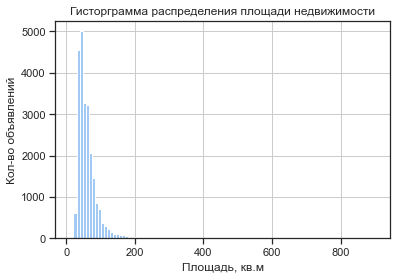

In [147]:
# Общий график
data['total_area'].hist(bins=100)
plt.xlabel('Площадь, кв.м')
plt.ylabel('Кол-во объявлений')
plt.title('Гисторграмма распределения площади недвижимости');

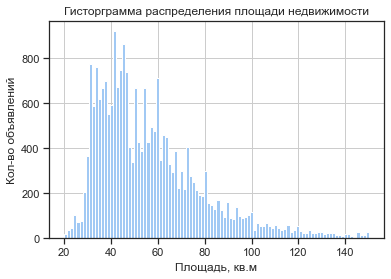

In [148]:
# График с подобранным диапазоном, который характеризует основную долю данных
data['total_area'].hist(bins=100, range=(20,150))
plt.xlabel('Площадь, кв.м')
plt.ylabel('Кол-во объявлений')
plt.title('Гисторграмма распределения площади недвижимости');

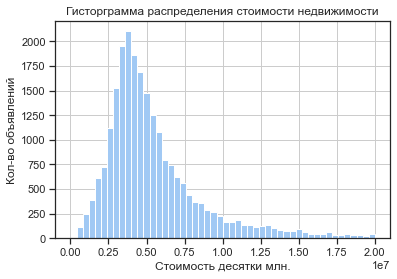

In [149]:
data['last_price'].hist(bins=50, range=(0, 2*10**7))
plt.xlabel('Стоимость десятки млн.')
plt.ylabel('Кол-во объявлений')
plt.title('Гисторграмма распределения стоимости недвижимости');

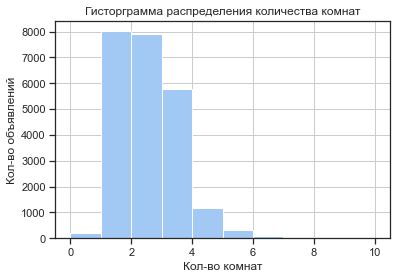

In [150]:
data['rooms'].hist(bins=10, range=(0, 10))
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объявлений')
plt.title('Гисторграмма распределения количества комнат');

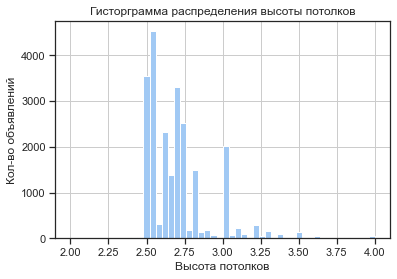

In [151]:
data['ceiling_height'].hist(bins=50, range=(2, 4))
plt.xlabel('Высота потолков')
plt.ylabel('Кол-во объявлений')
plt.title('Гисторграмма распределения высоты потолков');

Посмотрим на таблицу с описательной статистикой:

In [152]:
# Таблица с описательной статистикой
data_stat = data[['total_area', 'last_price', 'rooms', 'ceiling_height']]
data_stat = data_stat.describe()
data_stat.style.format({'total_area' : '{:.0f}', 
                   'last_price' : '{0:,.0f}', 
                   'rooms' : '{:.2f}', 
                   'ceiling_height' : '{:.2f}'})

,total_area,last_price,rooms,ceiling_height
count,23594,"23,594",23594.00,23592.00
mean,60,"6,539,645",2.07,2.74
std,36,"10,904,708",1.08,0.99
min,12,"12,190",0.00,1.00
25%,40,"3,400,000",1.00,2.55
50%,52,"4,650,000",2.00,2.65
75%,70,"6,790,000",3.00,2.75
max,900,"763,000,000",19.00,100.00


Рассмотрим выбросы.

Выберу выбросы X по следующим принципам:
 - $$X < Q_{25} - 1.5*IQR$$
 - $$X >  Q_{75} + 1.5*IQR$$

In [153]:
# Рассчет
data_stat_T = data_stat.T
data_stat_T['IQR'] = data_stat_T['75%'] - data_stat_T['25%']
data_stat_T['bottom'] = data_stat_T['25%'] - 1.5*data_stat_T['IQR']
data_stat_T['top'] = data_stat_T['75%'] + 1.5*data_stat_T['IQR']
data_stat_T.T.style.format({'total_area' : '{:.0f}', 
                   'last_price' : '{0:,.0f}', 
                   'rooms' : '{:.2f}', 
                   'ceiling_height' : '{:.2f}'})

,total_area,last_price,rooms,ceiling_height
count,23594,"23,594",23594.00,23592.00
mean,60,"6,539,645",2.07,2.74
std,36,"10,904,708",1.08,0.99
min,12,"12,190",0.00,1.00
25%,40,"3,400,000",1.00,2.55
50%,52,"4,650,000",2.00,2.65
75%,70,"6,790,000",3.00,2.75
max,900,"763,000,000",19.00,100.00
IQR,30,"3,390,000",2.00,0.20
bottom,-5,"-1,685,000",-2.00,2.25


In [154]:
# Удалаяю то, что за пределами интервала [bottom, top]
data = data[(data['total_area'] <= 114) &
            (data['last_price'] <= 11875000) &
            (data['rooms'] <= 6) & 
            (data['ceiling_height'].between(2.09, 3.22))]

In [155]:
# Таблица с описательной статистикой после
data_stat = data[['total_area', 'last_price', 'rooms', 'ceiling_height']]
data_stat = data_stat.describe()
data_stat.style.format({'total_area' : '{:.0f}', 
                   'last_price' : '{0:,.0f}', 
                   'rooms' : '{:.2f}', 
                   'ceiling_height' : '{:.2f}'})

,total_area,last_price,rooms,ceiling_height
count,20938,"20,938",20938.00,20938.00
mean,52,"4,752,459",1.90,2.66
std,17,"2,145,789",0.88,0.16
min,12,"12,190",0.00,2.20
25%,39,"3,300,000",1.00,2.55
50%,49,"4,350,000",2.00,2.60
75%,63,"5,900,000",3.00,2.75
max,114,"11,866,860",6.00,3.22


 - `total_area`
     - Большинство квартир имеют площадь от 39 до 63 кв. метров;
     - Квартир меньше 15 м кв. практически нет;
     - При увеличении площади со значения 60 кв.м. количество квартир плавно уменьшается.
 - `last_price`
     - Распределение значений близкое к нормальному с одним пиком, тяготеющим к 4.35 млн.
 - `rooms`
     - Большинство квартир имеют одну или две комнаты;
     - Квартиры с числом комнат >= пяти практически не встречаются.
 - `ceiling_height`
     - Гистограмма достаточно "рваная", что может указывать на то, что дисперсия в ряде данных может быть значительной;
     - Подавляющее количество квартир имеют высоту 2.5 м;
     - Большинство квартир имеют высоту потолка в диапазоне от 2.5 до 3 м включительно;
     - Квартир с высотой потолка менее 2.5 практически нет;
     - Квартиры с высотой потолка более 3 м встречаются редко.

### Время продажи квартиры

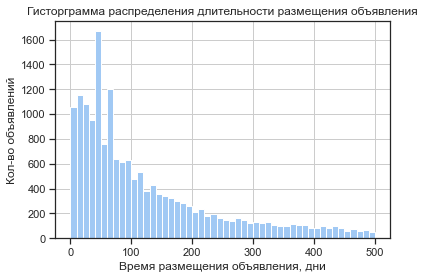

In [156]:
data['days_exposition'].hist(bins=50, range=(0, 500))
plt.xlabel('Время размещения объявления, дни')
plt.ylabel('Кол-во объявлений')
plt.title('Гисторграмма распределения длительности размещения объявления');

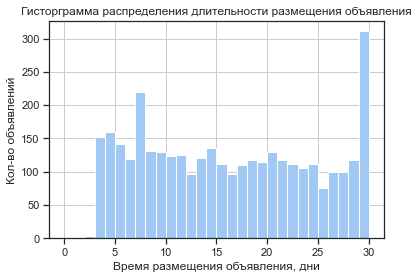

In [157]:
data['days_exposition'].hist(bins=30, range=(0, 30))
plt.xlabel('Время размещения объявления, дни')
plt.ylabel('Кол-во объявлений')
plt.title('Гисторграмма распределения длительности размещения объявления');

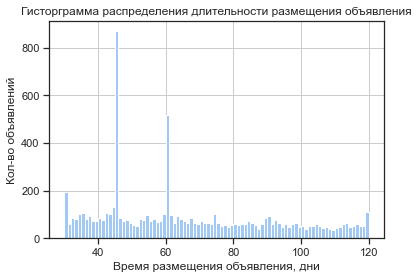

In [158]:
data['days_exposition'].hist(bins=90, range=(30, 120))
plt.xlabel('Время размещения объявления, дни')
plt.ylabel('Кол-во объявлений')
plt.title('Гисторграмма распределения длительности размещения объявления');

Посмотрим на основные статистики.

In [159]:
data['days_exposition'].mean()

171.34142368463918

In [160]:
data['days_exposition'].median()

90.00000000000001

В столбце 'days_exposition' обнаружилось несоответствие в некоторых дробных числах при фильтрации в котрой указываются целые числа:

In [161]:
data[data['days_exposition'] == 45]['days_exposition'].count()

0

Прифильтрации строк со значением 45 я получил их нулевое количество, хотя на графике их как минимум 350. Это может быть связано с длинной числа float, где на конце не всегда может быть 0.

Это можно решить с помощью метода округления round().

In [162]:
data['days_exposition'] = data['days_exposition'].round()

Далее подбираю диапазон для исключения.

In [163]:
data_interval = data.loc[(data['days_exposition'] >= 3) & (data['days_exposition'] <= 250)]
print('Доля оставшихся значений: {:.2%}'.format(len(data_interval) / len(data)))

Доля оставшихся значений: 68.92%


In [164]:
data_interval = data.loc[(data['days_exposition'] >= 3) & (data['days_exposition'] <= 500)]
print('Доля оставшихся значений: {:.2%}'.format(len(data_interval) / len(data)))

Доля оставшихся значений: 81.22%


Следует учитывать и долю значений с пропусками.

In [165]:
# Доля значений nan
nan_part = (data['days_exposition'].isna().sum()) / len(data)
print('Доля значений с пропусками: {:.2%}'.format(nan_part)) 

Доля значений с пропусками: 12.04%


In [166]:
print('Доля исключенных значений: {:.2%}'.format(1 - len(data_interval) / len(data) - nan_part))

Доля исключенных значений: 6.74%


In [167]:
# Присваиваем последний фильтр к data
data = data_interval

Как очень быстрые продажи я бы выделил период от 0 до 3 дней. Если квартиру не продали менее чем за 500 дней, то это необычайно долго. В этом значении интенсивность уменьшения количества при увеличении количества дней продажи снижается.

Для понимания аномалий следует обратиться на сайт поддержки яндекс.недвижимость.

Аномалии:
- первые 7 дней 
    - срок публикации длительной аренды до 20 тыс/м или комнаты, но в датасете нет аренды...
    - психологический срок снятия объявления "ну, недельку повисит, а там посмотрим..."   
- кратные 30 дням
    - срок бесплатного объявления
    - на 31 день происходит оплата
- 45 день
    - объявление остается актуальным до 45 дней (по данным поддержки)

### Какие факторы больше всего влияют на стоимость квартиры?

#### Зависит ли цена от площади, числа комнат, удалённости от центра.

In [168]:
# Расчет коэффициента корреляции
data_corr = data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']]
print('Коэффициент корреляции Пирсона')
for column in data_corr:
    if column == 'last_price':
        pass
    else:
        print(column, round(data_corr['last_price'].corr(data_corr[column]), 2))

Коэффициент корреляции Пирсона
total_area 0.69
rooms 0.43
city_centers_nearest -0.33


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


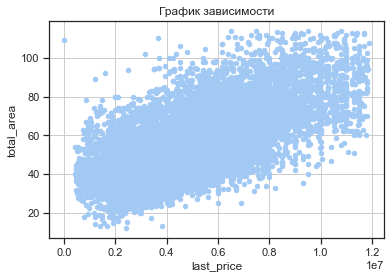

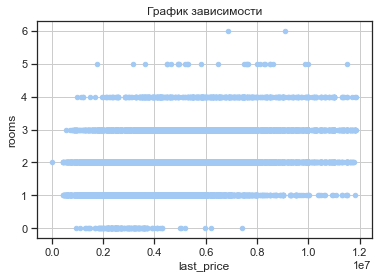

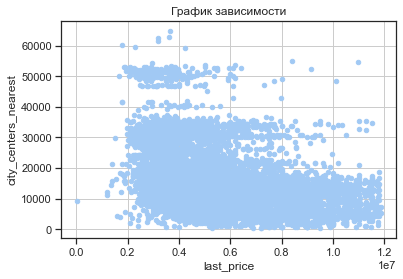

In [169]:
# Построение графиков 
for column in data_corr:
    if column == 'last_price':
        pass
    else:
        data_corr.plot(x='last_price', y=column, kind='scatter', grid=True)
        plt.title('График зависимости');

-`total_area`

    - Имеет самое высокое значение коэффициента корреляци, однако он не слишком большой, чтобы можно завсимость назвать однозначной;
    - На графике прослеживается постепенное уменьшение (рассеивание) зависимости при увеличении обеих характеристик.
    
-`rooms`

    - Зависимость не прослеживается;
    - Прослеживается примерно двухкратное увеличение цены у квартир с комнатами.
    
-`city_centers_nearest` 

    - Согласно коэффициенту корреляции прямой зависимости характеристик нет;
    - Наблюдается увеличение канала цен при расстоянии от центра менее 20 км;
    - Наблюдается пробел между значениями отдаленности от центра в диапазоне от 35 до 47 км.
    
Таким образом, явных и однозначных прямых зависимостей между ценой и рассматриваемыми характеристиками не наблюдается. Однако, с помощью графиков удалось выявить некоторые особенности ценообразования.

#### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [170]:
# Сводная таблица цены объявления и этажности
data_floors = data.pivot_table(index = 'floors_category', values = 'last_price', 
                            aggfunc = ['count', 'mean', 'max', 'min'])
data_floors.columns = ['Кол-во предложений', 'Средняя цена', 'Макс. цена', 'Мин. цена']
data_floors

,Кол-во предложений,Средняя цена,Макс. цена,Мин. цена
floors_category,,,,
другой,12656,4.852986e+06,11866860.0,450000.0
первый,2095,3.900911e+06,11800000.0,440000.0
последний,2255,4.303306e+06,11800000.0,12190.0


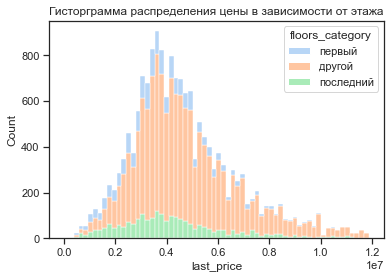

In [171]:
# Построение гистограммы
sns.set_theme(style="ticks", palette="pastel")
sns.histplot(data=data, x="last_price", hue="floors_category", multiple="stack")
plt.title('Гисторграмма распределения цены в зависимости от этажа');

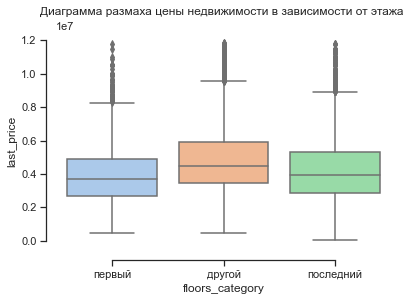

In [172]:
# Построение диаграммы размаха
sns.boxplot(x="floors_category", y="last_price", data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены недвижимости в зависимости от этажа \n');

Посмотрим на содные характеристики цены недвижимости и этажности.

In [173]:
# Сводная таблица цены квадратного метра и этажности 
data_floors = data.pivot_table(index = 'floors_category', values = 'price_per_meter', 
                            aggfunc = ['count', 'mean', 'max', 'min'])
data_floors.columns = ['Кол-во предложений', 'Средняя цена', 'Макс. цена', 'Мин. цена']
data_floors

,Кол-во предложений,Средняя цена,Макс. цена,Мин. цена
floors_category,,,,
другой,12656,95287.993466,292307.692308,10368.663594
первый,2095,77488.511396,196078.431373,9615.384615
последний,2255,83009.295458,276000.000000,111.834862


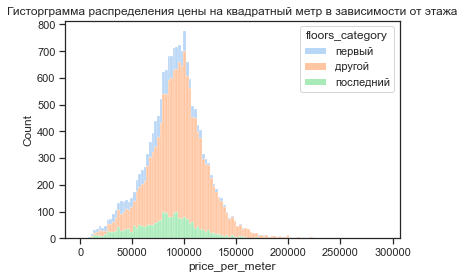

In [174]:
# Построение гистограммы для price_per_meter
sns.histplot(data=data, x="price_per_meter", hue="floors_category", multiple="stack")
plt.title('Гисторграмма распределения цены на квадратный метр в зависимости от этажа');

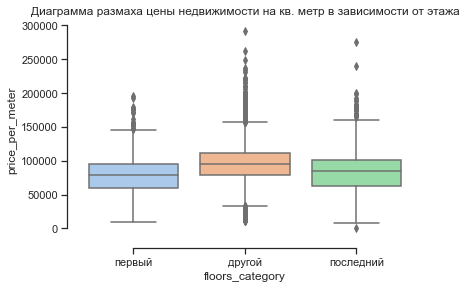

In [175]:
# Построение диаграммы размаха для price_per_meter
sns.boxplot(x="floors_category", y="price_per_meter", data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены недвижимости на кв. метр в зависимости от этажа');

- `last_price`

    - Средняя цена за квадратный метр выше всего ни на первом, ни на посдлем этажах;
    - Средняя цена за квадратный метр выше на последнем этаже, если срвнивать с ценой на первом;
    - Максимальные цены примерно оинаковы;
    - Отмечу минимальную цену на последнм этаже, она аномально низка и возможно это чердак.
    
- `price_per_meter`
    
    - Средняя цена за квадратный метр выше всего ни на первом, ни на посдлих этажах;
    - Средняя цена за квадратный метр выше на последнем этаже, если срвнивать с ценой на первом.


#### Зависимость от даты размещения: дня недели, месяца и года.

Диагарммы размаха с ценой объявлений.

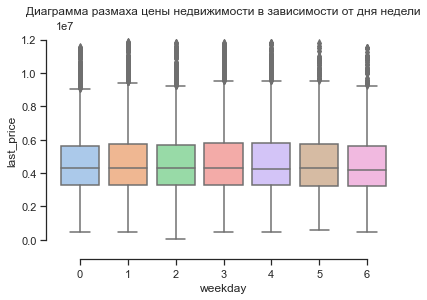

In [176]:
# Построение диаграммы размах для weekday
sns.boxplot(x="weekday", y="last_price", data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены недвижимости в зависимости от дня недели\n');

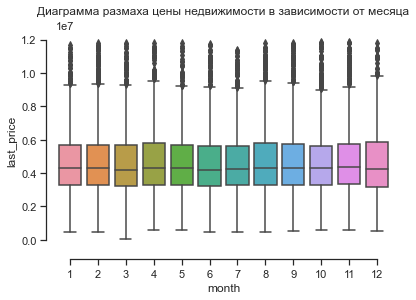

In [177]:
# Построение диаграммы размах для month
sns.boxplot(x="month", y="last_price", data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены недвижимости в зависимости от месяца\n');

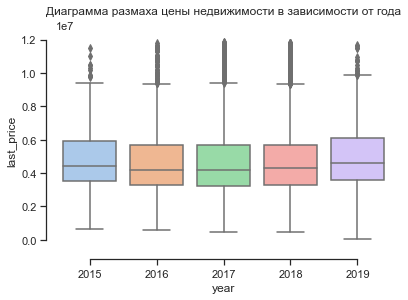

In [178]:
# Построение диаграммы размах для year
sns.boxplot(x="year", y="last_price", data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены недвижимости в зависимости от года\n');

Диагарммы размаха с ценой объявлений за кв. м

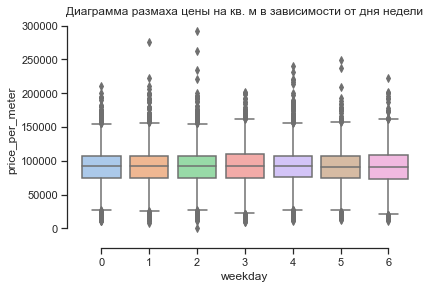

In [179]:
# Построение диаграммы размах для weekday
sns.boxplot(x="weekday", y="price_per_meter", data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены на кв. м в зависимости от дня недели');

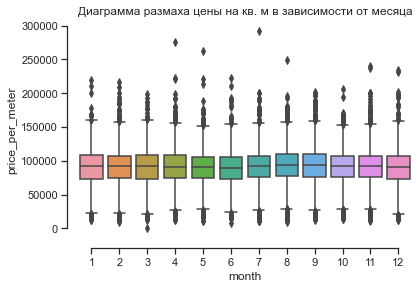

In [180]:
# Построение диаграммы размах для month
sns.boxplot(x="month", y="price_per_meter", data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены на кв. м в зависимости от месяца');

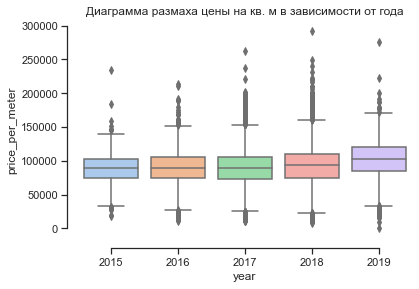

In [181]:
# Построение диаграммы размах для year
sns.boxplot(x="year", y="price_per_meter", data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены на кв. м в зависимости от года');

 - `weekday`
     - цены размещений распределены примерно равномерно между днями недели.
 - `month`
    - цены размещений распределены примерно равномерно между месяцами.
 - `year`
     - наблюдается тенденция к росту цены за квадратный метр с 2017 по 2019 годы.
     

### 10 населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

In [182]:
# Выбор топ 10 пунктов по количеству объявлений
top_10_towns = data['locality_name'].value_counts()[:10].index.tolist()
top_10_towns

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Колпино',
 'поселок Парголово',
 'деревня Кудрово',
 'Пушкин',
 'Гатчина',
 'Выборг']

In [183]:
# Расчет средней цены за квадратный метр
(data[data['locality_name'].isin(top_10_towns)]
     .groupby('locality_name')['price_per_meter']
     .mean()
     .sort_values(ascending=False))

locality_name
Санкт-Петербург      104315.329382
Пушкин                99196.686844
деревня Кудрово       92572.773323
поселок Парголово     89360.980969
поселок Мурино        85938.528597
поселок Шушары        77789.115010
Колпино               74548.830757
Гатчина               68241.087819
Всеволожск            66644.479441
Выборг                57185.015947
Name: price_per_meter, dtype: float64

По средней стоимости квадратного метра в объявлений лидирует Санкт-Петербург с отрывом в 10 000 от ближашего преследователя - города Пушкин.

Аутсайдер - Выборг.

### Анализ изменения цены по степени удалённости от центра

In [184]:
# Фильтрация расстояния по Петербургу и исключение лишних в этом кейсе столбцов
data['distance_from_center'] = (round(data[data['locality_name'] == 'Санкт-Петербург']['city_centers_nearest'] / 1000))
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
data_spb = data_spb[['distance_from_center', 'last_price']]
# Расчет средней цены по километражу
data_spb_pivot = data_spb.pivot_table(index='distance_from_center', values='last_price')
data_spb_pivot.columns = ['Цена']
data_spb_pivot[:10].style.format({'Цена' : 'Р {0:,.0f}'})

,Цена
distance_from_center,
0.000000,"Р 6,650,000"
1.000000,"Р 7,742,288"
2.000000,"Р 7,551,476"
3.000000,"Р 6,895,678"
4.000000,"Р 7,115,170"
5.000000,"Р 7,347,878"
6.000000,"Р 6,789,516"
7.000000,"Р 6,504,811"
8.000000,"Р 6,342,413"


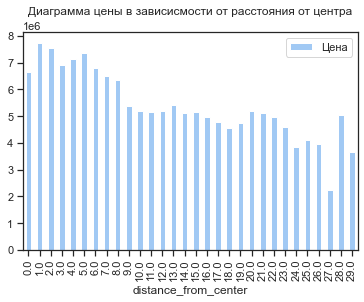

In [185]:
# Постороение графика
data_spb_pivot.plot(kind='bar')
plt.title('Диаграмма цены в зависисмости от расстояния от центра\n');

Прекращение интенсивной тенденции снижения цены при увеличении расстояния от центра наблюдается в 9 км. Зона радиусом 9 км от центра является центральной.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Посмотрим на ценообразование квартир в центре.

In [186]:
# Создаю датфрейм с нежвижимостью в центре Петербурга
data_center = data[(data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_nearest'] <= 9000)]

In [187]:
# Добавлю столбец со значениями, указывающим на принадлежность объявления к центру или перефирии
def center(row):
    if (row['locality_name'] == 'Санкт-Петербург') and (row['city_centers_nearest'] <= 9000):
        return 'центр'
    else: return 'переферия'

data['center'] = data.apply(center, axis=1)

#### Гистограмы. Площадь, цена, число комнат, высота потолков.

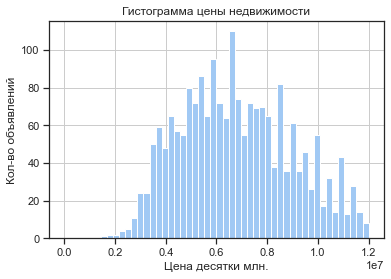

In [188]:
# Гистрограмма цены
data_center['last_price'].hist(bins=50, range=(0, 1.2*10**7))
plt.xlabel('Цена десятки млн.')
plt.ylabel('Кол-во объявлений')
plt.title('Гистограмма цены недвижимости');

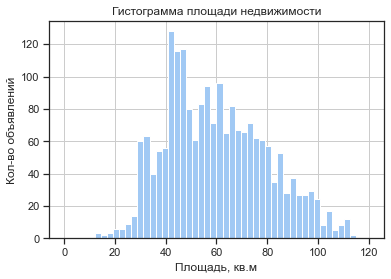

In [189]:
# Гистрограмма площади
data_center['total_area'].hist(bins=50, range=(0, 120))
plt.xlabel('Площадь, кв.м')
plt.ylabel('Кол-во объявлений')
plt.title('Гистограмма площади недвижимости');

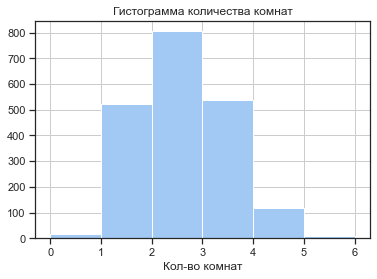

In [190]:
# Гистрограмма количества комнат
data_center['rooms'].hist(bins=6, range=(0, 6))
plt.xlabel('Кол-во комнат')
plt.title('Гистограмма количества комнат');

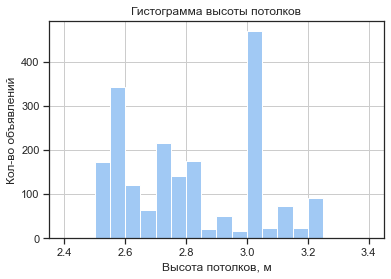

In [191]:
# Гистрограмма высоты потолков
data_center['ceiling_height'].hist(bins=20, range=(2.4, 3.4))
plt.xlabel('Высота потолков, м')
plt.ylabel('Кол-во объявлений')
plt.title('Гистограмма высоты потолков');

In [192]:
# Описательная статистика для центра
(
data_center[['last_price', 'total_area', 'rooms', 'ceiling_height']]
    .describe()
    .style.format({'total_area' : '{:.0f}', 
                   'last_price' : '{0:,.0f}', 
                   'rooms' : '{:.2f}', 
                   'ceiling_height' : '{:.2f}'})
)

,last_price,total_area,rooms,ceiling_height
count,"2,005",2005,2005.00,2005.00
mean,"6,785,914",60,2.12,2.79
std,"2,201,080",20,0.91,0.21
min,"1,600,000",12,0.00,2.40
25%,"5,100,000",44,1.00,2.55
50%,"6,600,000",58,2.00,2.75
75%,"8,400,000",74,3.00,3.00
max,"11,866,860",113,6.00,3.22


In [193]:
# Описательная статистика для всего датасета
(
data[['last_price', 'total_area', 'rooms', 'ceiling_height']]
    .describe()
    .style.format({'total_area' : '{:.0f}', 
                   'last_price' : '{0:,.0f}', 
                   'rooms' : '{:.2f}', 
                   'ceiling_height' : '{:.2f}'})
)

,last_price,total_area,rooms,ceiling_height
count,"17,006",17006,17006.00,17006.00
mean,"4,662,811",51,1.86,2.66
std,"2,066,257",17,0.87,0.15
min,"12,190",12,0.00,2.20
25%,"3,290,000",38,1.00,2.55
50%,"4,290,000",47,2.00,2.64
75%,"5,700,000",62,2.00,2.75
max,"11,866,860",114,6.00,3.22


 - `total_area`
     - Большинство квартир имеют площадь от 44 до 74 кв. метров;
     - Квартир меньше 15 м кв. практически нет.
 - `last_price`
     - Распределение значений близкое к нормальному с одним пиком, тяготеющим к 6.6 млн.
 - `rooms`
     - Большинство квартир имеют две комнаты;
     - Квартиры с числом комнат > 6 не встречаются.
 - `ceiling_height`
     - Гистограмма достаточно "рваная", что может указывать на то, что дисперсия в ряде данных может быть значительной;
     - Подавляющее количество квартир имеют высоту 3 и 2.5 м;
     - Квартир с высотой потолка менее 2.4 нет.

**Отличия от общего датасета**

 - `total_area`
     - Квартиры имеют большую площадь.
 - `last_price`
     - Медианное значение цены выше.
 - `rooms`
     - Однокомнатные квартиры встречаются реже.
 - `ceiling_height`
     - Доля квартир с 3-хметровым потолком больше.

#### Зависимость цены от площади, числа комнат, удалённости от центра.

Для определения связи между ценой и рассматриваемыми характеристиками посчитаем коэффициент корреляции Пирсона.

In [194]:
# Расчет коэффициента корреляции Пирсона
data_corr = data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']]
data_center_corr = data_center[['last_price', 'total_area', 'rooms', 'city_centers_nearest']]
matrix = pd.DataFrame()
print('Коэффициент корреляции Пирсона')

for column in data_corr:
    if column == 'last_price':
        pass
    else:
        matrix.loc['data', column] = round(data_corr['last_price'].corr(data_corr[column]), 2)
        matrix.loc['data_center', column] = round(data_center_corr['last_price'].corr(data_center_corr[column]), 2)

# В первой строке коэф. кор. для всего датасета, во второй для центра петербурга
matrix

Коэффициент корреляции Пирсона


,total_area,rooms,city_centers_nearest
data,0.69,0.43,-0.33
data_center,0.73,0.45,-0.21


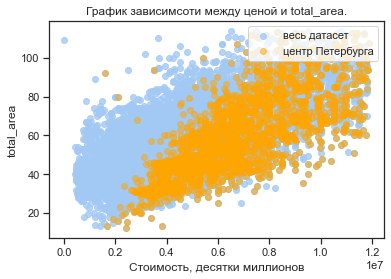

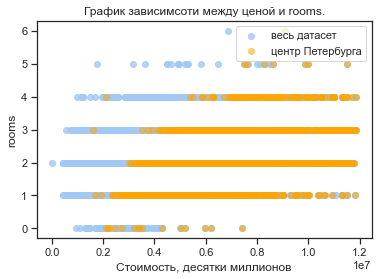

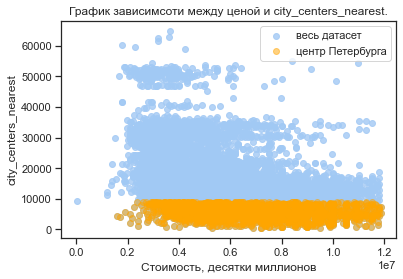

In [195]:
# Построение мулти scatter plot
for column in data_corr:
    if column == 'last_price':
        pass
    else:
        fig = plt.figure()
        ax1 = fig.add_subplot()
        ax1.scatter(data_corr['last_price'], data_corr[column], label='весь датасет', alpha = 0.8)
        ax1.scatter(data_center_corr['last_price'], data_center_corr[column], c='orange', label='центр Петербурга', alpha = 0.5)
        plt.legend(loc='upper right')
        plt.xlabel('Стоимость, десятки миллионов')
        plt.ylabel(column)
        plt.title("График зависимсоти между ценой и {}.".format(column));


- `total_area`

    - Имеет самое высокое значение коэффициента корреляции, однако он не слишком большой, чтобы можно завсимость назвать однозначной;
    - На графике прослеживается постепенное уменьшение зависимости при увеличении обеих характеристик (точки рассеиваются).
    
- `rooms`

    - Тесной зависимости не прослеживается;
    - Не наблюдается маленьких цен.
    
- `city_centers_nearest` 

    - Согласно коэффициенту корреляции зависимости характеристик нет.
    
Таким образом, явных и однозначных прямых зависимостей между ценой и рассматриваемыми характеристиками не наблюдается. Цена зависит в первую очередь от площади. С помощью графиков удалось выявить некоторые особенности ценообразования.

**Отличия от всего датасета**
- `total_area`

    - Коэффициент корреляции выше;
     
- `city_centers_nearest` 

    - Цены выше, чем в остальных локациях и абсолютно не завсят от расстояния от центра.

#### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

Посмотрим на сводную таблицу цены объявления и этажности по всему датасету.

In [196]:
# Сводная таблица цены объявления и этажности по всему датасету
data_floors = data.pivot_table(index = 'floors_category', values = 'last_price', 
                            aggfunc = ['count', 'mean', 'max', 'min'])
data_floors.columns = ['Кол-во предложений', 'Средняя цена', 'Макс. цена', 'Мин. цена']
data_floors

,Кол-во предложений,Средняя цена,Макс. цена,Мин. цена
floors_category,,,,
другой,12656,4.852986e+06,11866860.0,450000.0
первый,2095,3.900911e+06,11800000.0,440000.0
последний,2255,4.303306e+06,11800000.0,12190.0


Посмотрим на сводную таблицу цены объявления и этажности в центре.

In [197]:
# Сводная таблица цены объявления и этажности по центру
data_floors = data_center.pivot_table(index = 'floors_category', values = 'last_price', 
                            aggfunc = ['count', 'mean', 'max', 'min'])
data_floors.columns = ['Кол-во предложений', 'Средняя цена', 'Макс. цена', 'Мин. цена']
data_floors

,Кол-во предложений,Средняя цена,Макс. цена,Мин. цена
floors_category,,,,
другой,1415,7.011629e+06,11866860.0,1900000.0
первый,262,5.577014e+06,11500000.0,1600000.0
последний,328,6.777819e+06,11793000.0,2990000.0


Графическое отображение зависимости цены и этажности центра и всего датасета.

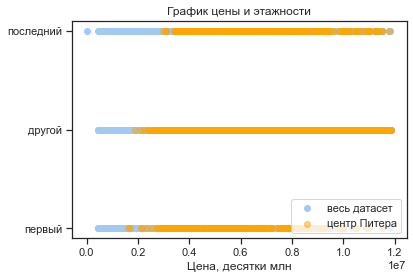

In [198]:
# Построение scatter plot last_price
fig = plt.figure()
ax1 = fig.add_subplot()
scatter1 = ax1.scatter(data['last_price'], data['floors_category']);
scatter2 = ax1.scatter(data_center['last_price'], data_center['floors_category'], c='orange', alpha=0.5);
ax1.legend([scatter1, scatter2], ['весь датасет', 'центр Питера'])
plt.xlabel('Цена, десятки млн')
plt.title('График цены и этажности');

Графическое отображение размаха цены и этажности центра в зависимости от расположения.

Text(0.5, 1.0, 'Диаграмма размаха цены (десятк млн.) в зависимости от этажности')

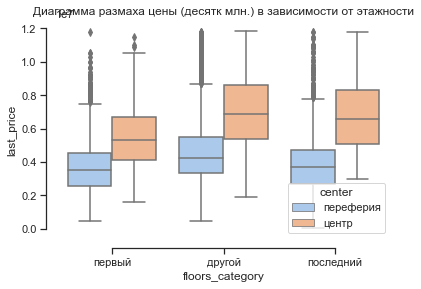

In [199]:
# Построение совместной (центр, перефирия) диаграммы размаха с ценой обявления
sns.boxplot(x="floors_category", y="last_price", hue='center', data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены (десятк млн.) в зависимости от этажности\n')

Теперь сделаем те же самые шаги, только для цена на один кв. метр.

In [200]:
# Сводная таблица цены квадратного метра и этажности всего датасета 
data_floors = data.pivot_table(index = 'floors_category', values = 'price_per_meter', 
                            aggfunc = ['count', 'mean', 'max', 'min'])
data_floors.columns = ['Кол-во предложений', 'Средняя цена', 'Макс. цена', 'Мин. цена']
data_floors

,Кол-во предложений,Средняя цена,Макс. цена,Мин. цена
floors_category,,,,
другой,12656,95287.993466,292307.692308,10368.663594
первый,2095,77488.511396,196078.431373,9615.384615
последний,2255,83009.295458,276000.000000,111.834862


In [201]:
# Сводная таблица цены квадратного метра и этажности центра
data_floors = data_center.pivot_table(index = 'floors_category', values = 'price_per_meter', 
                            aggfunc = ['count', 'mean', 'max', 'min'])
data_floors.columns = ['Кол-во предложений', 'Средняя цена', 'Макс. цена', 'Мин. цена']
data_floors

,Кол-во предложений,Средняя цена,Макс. цена,Мин. цена
floors_category,,,,
другой,1415,119742.108419,292307.692308,26250.000000
первый,262,106396.994504,192592.555556,17391.304348
последний,328,110644.358583,240000.040000,54000.000000


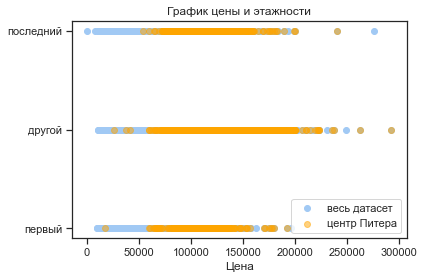

In [202]:
# Построение scatter plot price_per_meter
fig = plt.figure()
ax1 = fig.add_subplot()
scatter1 = ax1.scatter(data['price_per_meter'], data['floors_category']);
scatter2 = ax1.scatter(data_center['price_per_meter'], data_center['floors_category'], c='orange', alpha=0.5);
ax1.legend([scatter1, scatter2], ['весь датасет', 'центр Питера'])
plt.xlabel('Цена')
plt.title('График цены и этажности');

Text(0.5, 1.0, 'Диаграмма размаха цены на 1 кв. м в зависимости от этажности')

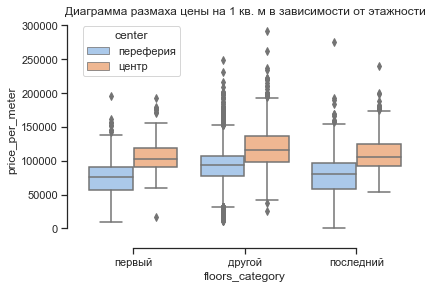

In [203]:
# Построение совместной (центр, перефирия) диаграммы размаха с ценой обявления
sns.boxplot(x="floors_category", y="price_per_meter", hue='center', data=data)
sns.despine(offset=10, trim=True)
plt.title('Диаграмма размаха цены на 1 кв. м в зависимости от этажности');

- `last_price`

    - Средняя цена квартир на "других" этажах выше;
    - Максимальные цены распределены так же.
    
- `price_per_meter`
    
    - Средняя цена за квадратный метр выше всего на "других" этажах;
    - Средняя цена за квадратный метр выше на последнем этаже, если срвнивать с ценой на первом;
    

**Отличия от общего датасета**

- `last_price`

    - Характер распределения цен на последнем этаже похож на характер распределения на других этажах;
    - В среднем в центре цены выше.
    
- `price_per_meter`
    
    - В среднем в центре цены выше.
   

#### Зависимость цены от даты размещения: дня недели, месяца и года.

Посмотрим на зависимость цены от даты размещения: дня недели, месяца и года для центра и переферии. Для этого построим диаграммы размаха.

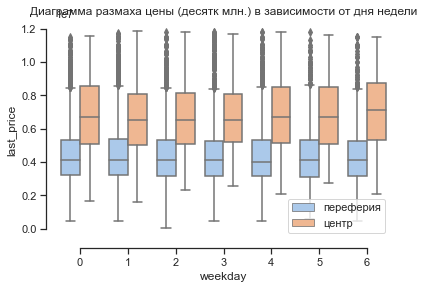

In [204]:
# Построение совмещенной диаграммы (центр и перефирия) с ценой объявления по weekday
sns.boxplot(x='weekday', y="last_price", hue='center', data=data)
sns.despine(offset=10, trim=True)
plt.legend(loc='lower right')
plt.title('Диаграмма размаха цены (десятк млн.) в зависимости от дня недели\n');

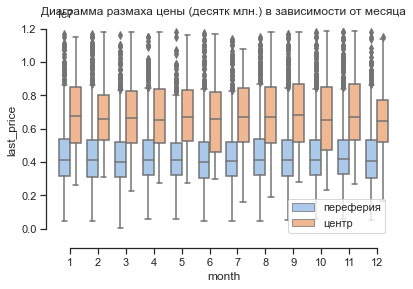

In [205]:
# Построение совмещенной диаграммы (центр и перефирия) с ценой объявления по month
sns.boxplot(x='month', y="last_price", hue='center', data=data)
sns.despine(offset=10, trim=True)
plt.legend(loc='lower right')
plt.title('Диаграмма размаха цены (десятк млн.) в зависимости от месяца\n');

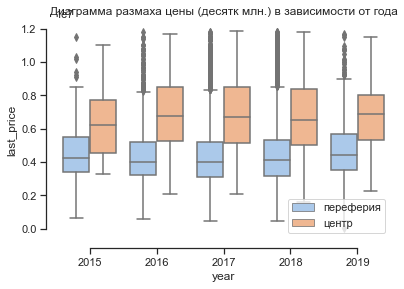

In [206]:
# Построение совмещенной диаграммы (центр и перефирия) с ценой объявления по year
sns.boxplot(x='year', y="last_price", hue='center', data=data)
sns.despine(offset=10, trim=True)
plt.legend(loc='lower right')
plt.title('Диаграмма размаха цены (десятк млн.) в зависимости от года\n');

 - `weekday`
     - цены немного больше в воскресенье и понедельник, как и амплитуда.
 - `month`
     - январь, июнь, октябрь - амплитуда цен больше.
 - `year`
     - с 2015 по 2018 диапазон цен увеличивался;
     - в 2015 году были наиболее низкие цены.
     

## Общий вывод

1. Обзор данных
    - Рассмотрен тип данных в столбцах;
    - Основные характеристики данных получены методом describe();
    - Оценено количество данных и параметров.
2. Предобработка данных
    - Названия столбцов переименованы в более удобный стиль, а также приведены к одному регистру;
    - Оценено количество пропусков по каждому столбцу;
    - Пропуски в данных категоризированы;
    - Выполнены замены пропусков в тех случаях, где на мой взгляд это действительно необходимо;
    - Заменены 4 столбца float на int, один на bool и еще один на datetime;
    - Явные дубликаты обнаружены с учетом повторных объявлений;
    - Неявные дубликаты устранены.
3. Расчеты и добавление результатов в таблицу
    - Рассчитаны основные показатели.
4. Исследовательский анализ данных
    - Выводы по всей базе:
        - Большинство квартир имеют площадь от 39 до 63 кв. метров;
        - Квартир меньше 15 м кв. практически нет;
        - Медианное значение цена приблизительно 4.35 млн;
        - Большинство квартир имеют одну или две комнаты;
        - Подавляющее количество квартир имеют высоту 2.5 м;
        - Устранены объявления с короткими и очень длительными продажами;
        - Обнаружены аномалии в длительности продаж, высказанны их причины;
        - Обнаружена слабая прямая зависимость цены от общей площади;
        - Прямых зависимостей между ценой, количеством комнат и расстоянием от центра нет;
        - Описан ряд особенностей ценообразования в зависимости от площади, количества комнат и расстояния от центра;
        - Средняя цена квартир на "других" этажах выше, а на первом ниже остальных этажей;
        - Средняя цена за квадратный метр выше на "других" этажах;
        - Цена объявлений плюс минус равномерна в завсисимости от дня недели и месяца;
        - Наблюдается тенденция к росту цены за квадратный метр с 2017 по 2019 годы;
        - По средней стоимости квадратного метра лидирует Санкт-Петербург, а 10-ку замыкает Выборг;
        - Выделена центральная зона - до 9 км от центра.
    - Квартиры в центре:
        - Квартриры имеют большую площадь на 9 кв. м;
        - Большинство квартир имеют две комнаты;
        - Подавляющее количество квартир имеют высоту 3 и 2.5 м;
        - Зависимость цены от площади более тесная;
        - Цены в центре выше и внутри центра зависимости от расстояни не наблюдается;
        - С 2015 по 2018 диапазон цен увеличивался;
        - В 2015 году были наиболее низкие цены.